In [2]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from lifelines import KaplanMeierFitter

In [3]:
# Load the data (Replace 'your_file_path' with the actual file path)
data = pd.read_excel('1.xlsx')

In [4]:
# Extract the year from the '설립일자' and '폐업일' columns
data['설립년도'] = data['설립일자'].dt.year
data['폐업년도'] = pd.to_datetime(data['폐업일'], errors='coerce').dt.year

In [5]:
# Calculate the duration of each company in days
data['기간(일)'] = (datetime.now() - data['설립일자']).dt.days

In [11]:
# Convert the duration from days to months
data['기간(월)'] = data['기간(일)'] / 30

In [12]:
# Filter out irrelevant or faulty data
filtered_data = data[(data['폐업여부'].isin([0, 1])) & (data['기간(일)'].notna())]


In [13]:
# Prepare data for Kaplan-Meier estimator
T = filtered_data['기간(월)']
E = filtered_data['폐업여부'].astype(int)

In [14]:
# Data for platform and non-platform companies
T_platform = T[filtered_data['플랫폼 여부'] == '플랫폼']
E_platform = E[filtered_data['플랫폼 여부'] == '플랫폼']
T_non_platform = T[filtered_data['플랫폼 여부'] == '비플랫폼']
E_non_platform = E[filtered_data['플랫폼 여부'] == '비플랫폼']

In [15]:
# Initialize Kaplan-Meier fitter
kmf = KaplanMeierFitter()


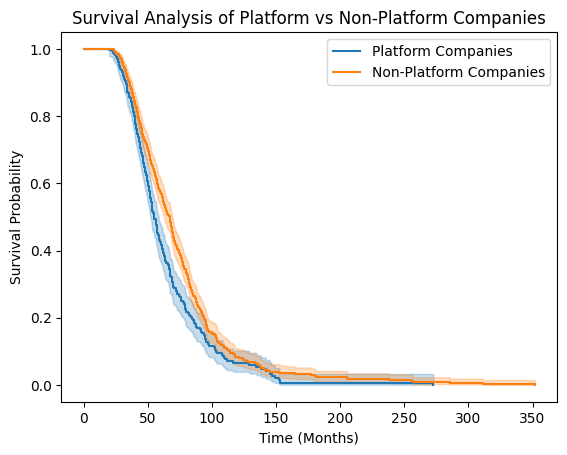

In [16]:
# Fit the data into the estimator and plot the survival function
kmf.fit(T_platform, event_observed=E_platform, label='Platform Companies')
ax = kmf.plot()
kmf.fit(T_non_platform, event_observed=E_non_platform, label='Non-Platform Companies')
kmf.plot(ax=ax)
plt.xlabel('Time (Months)')
plt.ylabel('Survival Probability')
plt.title('Survival Analysis of Platform vs Non-Platform Companies')
plt.show()